In [1]:
import math
import random
import torch
import numpy as np
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import copy
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import time


from scipy.interpolate import griddata

D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#global veriable 
Uniform_low_bound=0
Uniform_up_bound=1
Agent_number_n=10000

number_of_groups=2

Normal_loc=0.5
Normal_scale=0.2
Normal_loc1=0.15
Normal_loc2=0.85
Normal_scale1=0.1
Normal_scale2=0.1
Distribution_number=2000
global count_number
count_number=0

In [3]:
class Foo(object):

    def __init__(self, test_item, test_change_item, deadline):
        self.test_item = test_item
        self.test_change_item = test_change_item
        self.deadline = deadline

    def __lt__(self, other):
        return self.test_change_item < other.test_change_item

2000
2000


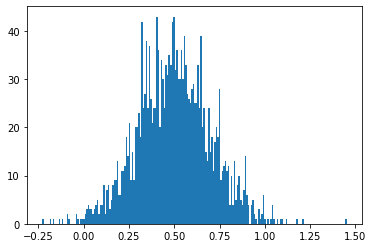

400
1600


In [4]:
seed = 7
np.random.seed(seed)
#exec(open('distribution/twopeak.py').read())
#exec(open('distribution/uniform.py').read())
exec(open('distribution/normal.py').read())
X_train,  X_test = train_test_split(value_list, test_size=0.8, random_state=seed)

dataset_size = len(X_train)
print(dataset_size)
#print(X_train[:100])
print(len(X_test))
#run_cs()

In [5]:
def cost_sharing_with_deadline(test,t_c,target):
    temp_max_delay_list=[0 for i in range(len(test))]
    temp_sum_delay=0
    result=False
    
    started=0
    for k in range(len(test),0,-1):
        count=0;
        delay=0;
        for ii in range(started,len(test)):
            item= test[ii]
            started=ii
            if(item+1e-9>=target/k):
                count+=len(test)-ii;
                break;
            
        if(count>=k):
            temp_sum_delay+=t_c[0]*started;
            for ii in range(0,started):
                temp_max_delay_list[ii]=t_c[ii]
            result=True
            break;
        if(k<=1):
            #print(test,number_n);
            temp_max_delay_list=t_c
            temp_sum_delay=sum(t_c);
            result=False
            
    return temp_max_delay_list,temp_sum_delay,result


def cost_sharing_with_deadline_free(n,_i,numbers_of_people_will_pay,started_k):
    
    for k in range(started_k,0,-1):
        if(n-_i<=k):
            x=k-1
        else:
            x=k
        #print(n,_i,x,numbers_of_people_will_pay[x],k)
        if(numbers_of_people_will_pay[x]>=k):
            return True,k
        
            
    return False,0





#Cost Sharing
def run_cs(deadline_list):
    sum_delay=0
    max_delay=0
    test_number=0
    seconds_start=time.time()
    for i in range(len(X_test)):
#        if(i%1000==0):
#            seconds=time.time()
#            print("times: ",seconds-seconds_start)
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test = copy.deepcopy(X_test[i])
        #test_change = copy.deepcopy(X_test[i]);
        test_change_temp = []
        Foo_list = []
        
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
        
        for j in range(len(test)):
            test_change_temp.append(test[j] * deadline_list[j])
            Foo_list.append(Foo(test[j],test_change_temp[j],deadline_list[j]))
            
        Foo_list.sort(reverse=False)
        

        for j in range(len(test)):
            test[j]=Foo_list[j].test_item
            test_change_temp[j]=Foo_list[j].test_change_item
            deadline_list[j]=Foo_list[j].deadline

        test_change = copy.deepcopy(test_change_temp);
        
        numbers_of_people_will_pay = [-10 for ii in range(len(test_change)+2)]#pay 1/k
        
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
        k = 1
        started=len(test_change)-1
        end_k=-10
        for j in range(len(test_change)):
            if(k<=len(test_change)):
                for people_id in range(started,-1,-1):
                    if(test_change[people_id]+1e-9>=1.0/k):
                        started=people_id
                        numbers_of_people_will_pay[k]=len(test_change)-people_id
                        end_k=len(test_change)-people_id
                    else:
                        k+=1
                        break;
                    
        for j in range(k,len(test_change)+1):
            numbers_of_people_will_pay[j]=end_k
            
        deadlist_new=copy.deepcopy(deadline_list)
        
        temp_max_delay_list,temp_sum_delay,judge_i =  cost_sharing_with_deadline(test_change,
                        deadlist_new,1.0)
        
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
#         print()
#         print(test_change)
#         print(temp_max_delay_list)
#         print(temp_sum_delay)
#         print(judge_i)
        
#         #         print(test_change)
#         oo=[]
#         for j in range(1,len(test_change)+1):
#             oo.append( round(1.0/j, 2))

#         print(oo)
#         print(numbers_of_people_will_pay)
#         print()

        judge_i= True
        started_k = len(test)
        for _i in range(len(test_change)):
            if judge_i:
                judge_i,started_k =  cost_sharing_with_deadline_free(len(test_change),
                    _i,numbers_of_people_will_pay,started_k)
            #print(judge_i,_i,started_1,1.0/(started_1+0.001))
            
            #print(_i,judge_i,started_k)
            started_k+=1
            if(judge_i==False):
                temp_sum_delay += (1.0-deadline_list[_i])
                temp_max_delay_list[_i] += (1.0-deadline_list[_i])
#         print("count_number",count_number)
        #print(judge_i)
#         seconds=time.time()
#         print("times: ",seconds-seconds_start)
        
        max_delay+=max(temp_max_delay_list)
        
        sum_delay+=temp_sum_delay
        
    print("deadline: ",deadline_list[0])
    print("sum_delay: ",sum_delay/test_number)
    print("max_delay: ",max_delay/test_number)
    print()
    return sum_delay/test_number
    
    


In [6]:
devided=10000

for deadline in range(2,21):
    deadline_free = (devided-deadline) /devided
    deadline = (deadline) /devided
    deadline_list = [deadline for i in range(Agent_number_n)]
    run_cs(deadline_list)  # deadline=0 free get; deadline=1 full payment 
    print()
    

deadline:  0.0002
sum_delay:  9999.999999998023
max_delay:  1.0


deadline:  0.0003
sum_delay:  10000.000000001764
max_delay:  1.0


deadline:  0.0004
sum_delay:  0.6112290000000004
max_delay:  0.00039999999999999677


deadline:  0.0005
sum_delay:  0.39296093749999933
max_delay:  0.0004999999999999795


deadline:  0.0006
sum_delay:  0.3160424999999998
max_delay:  0.0006000000000000177


deadline:  0.0007
sum_delay:  0.2775508749999999
max_delay:  0.0007000000000000031


deadline:  0.0008
sum_delay:  0.2556959999999999
max_delay:  0.0007999999999999935


deadline:  0.0009
sum_delay:  0.242710875
max_delay:  0.0008999999999999768


deadline:  0.001
sum_delay:  0.2348337500000005
max_delay:  0.000999999999999959


deadline:  0.0011
sum_delay:  0.2305476250000003
max_delay:  0.0011000000000000387


deadline:  0.0012
sum_delay:  0.22850849999999998
max_delay:  0.0012000000000000355


deadline:  0.0013
sum_delay:  0.22834012500000042
max_delay:  0.0013000000000000355


deadline:  0.0014
sum_

In [7]:
#Cost Sharing
def run_cs_pure():
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test=copy.deepcopy(X_test[i]);

        for k in range(Agent_number_n,0,-1):
            count=0;
            delay=0;
            for item in test:
                if(item>=1.0/k):
                    count+=1;
                else:
                    delay+=1;
            if(count>=k):
                temp_delay=delay;
                if temp_delay != 0 :
                    temp_max_delay = 1
                break;
            if(k<=1):
                #print(test);
                temp_delay=Agent_number_n;
                temp_max_delay=1
        
        
        sum_delay+=temp_delay
        max_delay+=temp_max_delay
                
    print("max_delay",max_delay/test_number);
    print("sum_delay",sum_delay/test_number);
    

    run_cs_pure()